## Exploratory Data Analysis
### It’s a technique of exploring the data to get better understanding of it.

### Gain insights by plotting different kinds of graphs using Python libraries, Seaborn, and Matplotlib.

# Import libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To ignore Warning
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Read the dataset
df=pd.read_csv('Titanic.csv')

### Basic EDA

In [5]:
# Get the top 5 Records
df.head(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


In [6]:
# Get the bottom 5 Records
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
# Get the number of rows & Columns
df.shape

(891, 12)

In [8]:
# Get more information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
# Get the list of columns
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
# Get the Statistical Information about the dataset
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Data Cleaning

In [11]:
# Check for Null Values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
# Check for Duplicate Values
df[df.duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [13]:
# Remove Duplicate Values
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)
df.shape

(891, 12)

# Outlier
Outlier is an observation in a given dataset that lies far from the rest of the observations.
An outlier may occur due to the variability in the data, or due to experimental error/human error.

<Axes: >

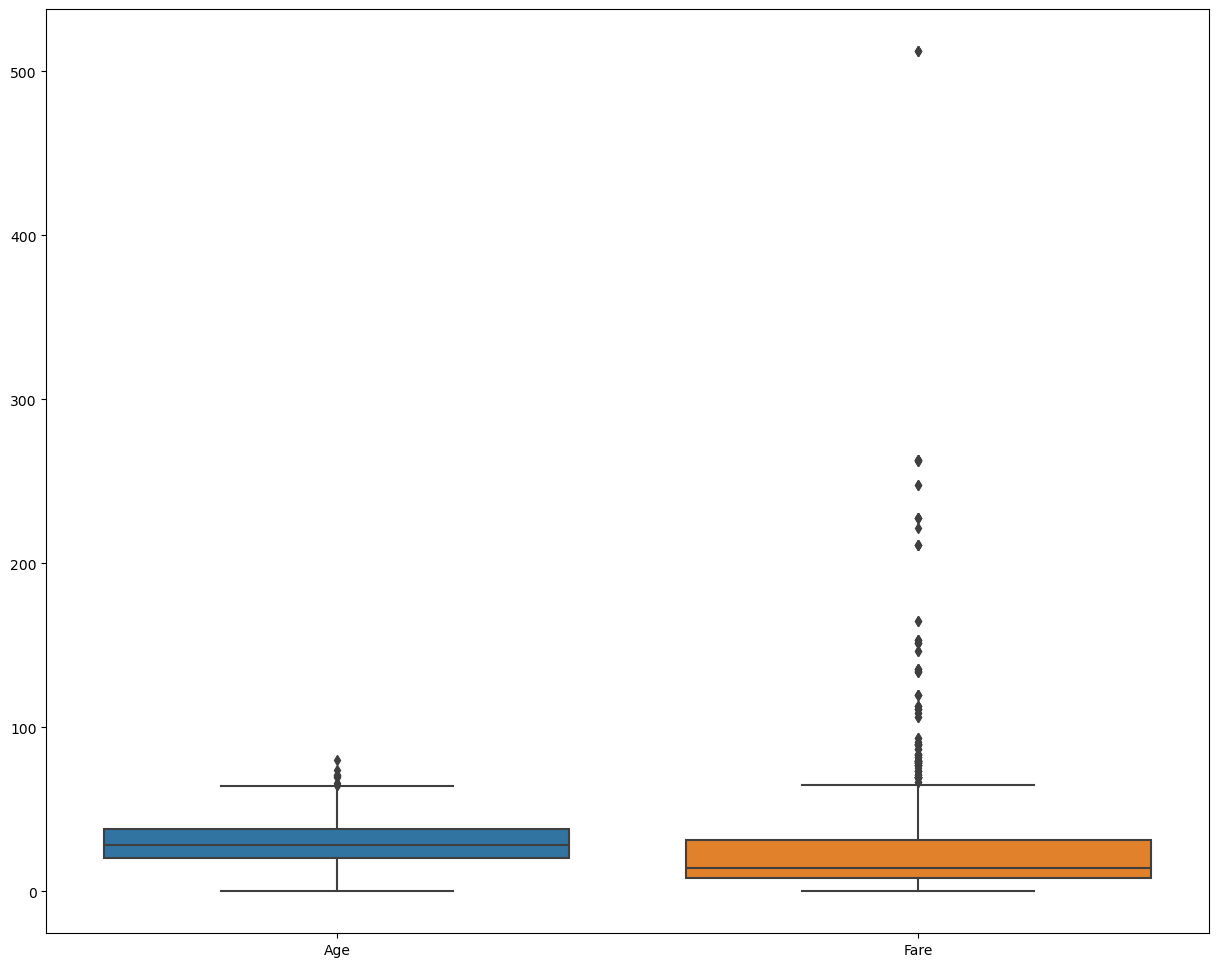

In [16]:
# Checking for the presence of outliers in numeric cols ('age','trtbps','chol','thalachh','oldpeak')

plt.figure(figsize=(15,12)) # Set the Width & Height
# df.boxplot(column=['age','trtbps','chol','thalachh','oldpeak'])  
sns.boxplot(data=df[['Age','Fare']])

In [19]:
import numpy as np


def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data < lower_bound) | (data > upper_bound)]

# Detect outliers in 'Age' and 'Fare'
outliers_age = detect_outliers_iqr(df['Age'])
outliers_fare = detect_outliers_iqr(df['Fare'])

print(f"Outliers in Age: {len(outliers_age)}")
print(f"Outliers in Fare: {len(outliers_fare)}")


df['Age'] = np.where(df['Age'] > outliers_age.quantile(0.95), outliers_age.quantile(0.95), df['Age'])
df['Fare'] = np.where(df['Fare'] > outliers_fare.quantile(0.95), outliers_fare.quantile(0.95), df['Fare'])

Outliers in Age: 11
Outliers in Fare: 116


<Axes: >

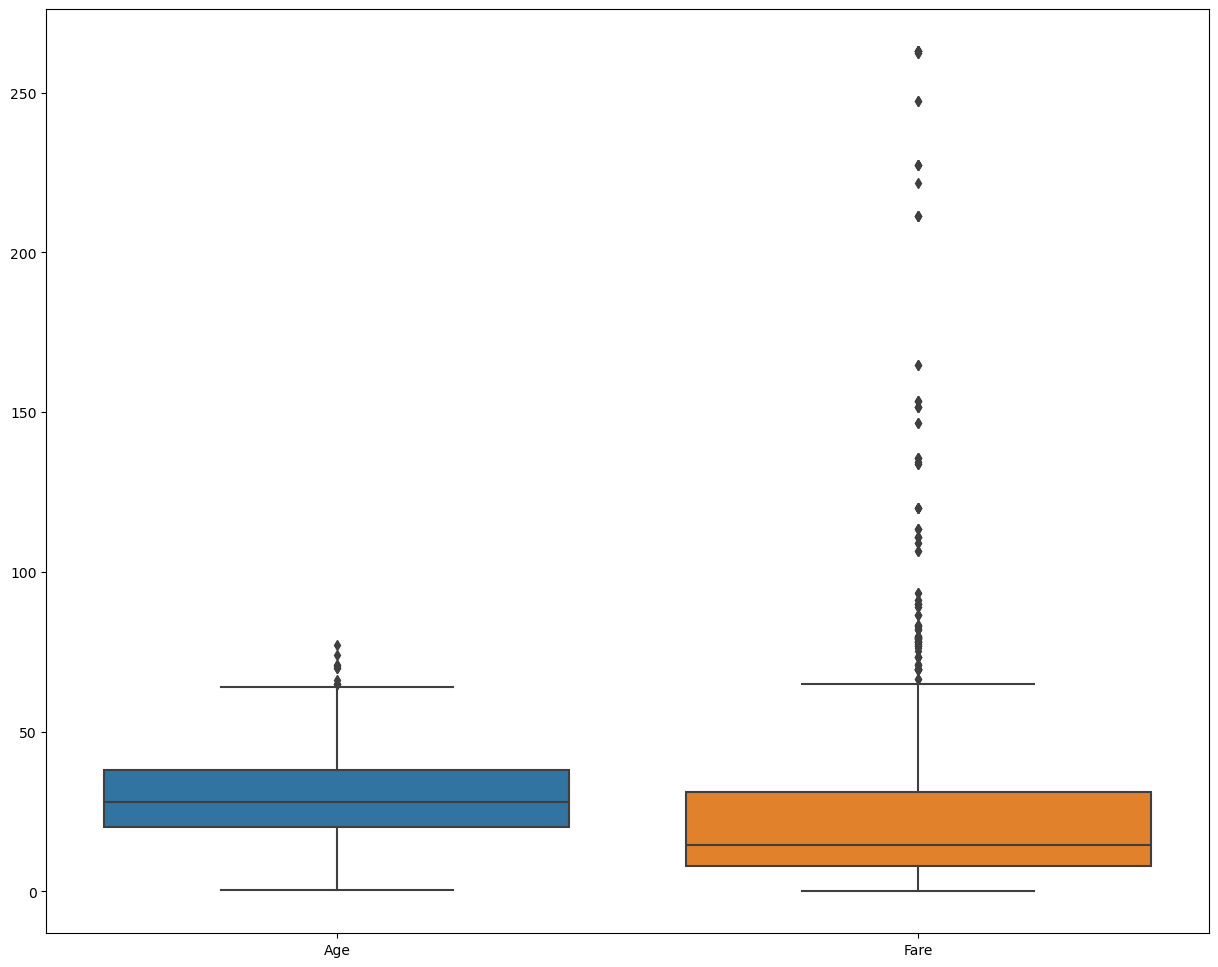

In [20]:
plt.figure(figsize=(15,12))
sns.boxplot(data=df[['Age','Fare']])

## Univariate Analysis

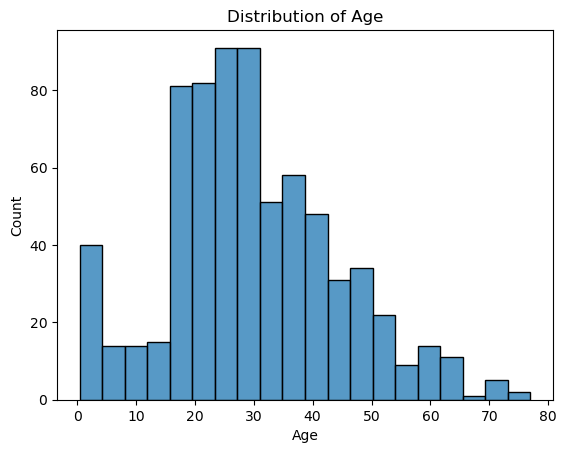

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.histplot(df['Age'])
plt.title('Distribution of Age')
plt.show()

## Bivariate Analysis

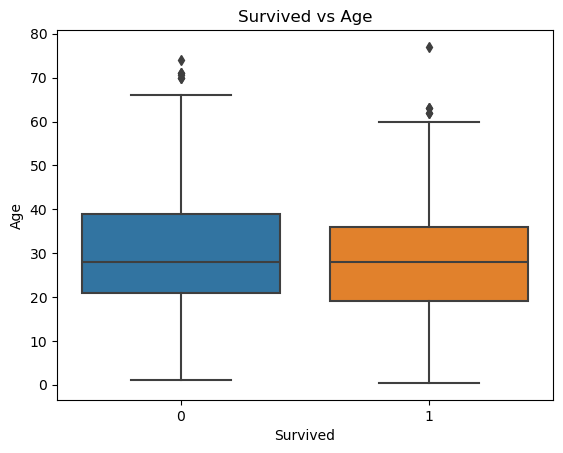

In [23]:
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Survived vs Age')
plt.show()

## Multivariate Analysis

<Axes: xlabel='Survived', ylabel='Age'>

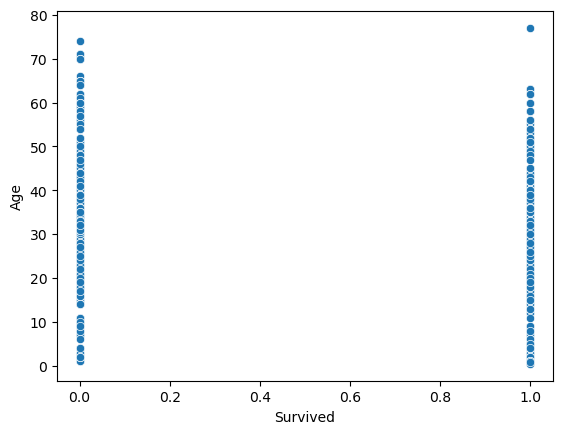

In [24]:
sns.scatterplot(x='Survived', y='Age',data=df)

# Feature Scaling

In [25]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age','Fare']])

In [28]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,-0.530604,1,0,A/5 21171,-0.557777,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.572678,1,0,PC 17599,0.923322,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,-0.254783,0,0,STON/O2. 3101282,-0.542164,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.365813,1,0,113803,0.502740,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,0.365813,0,0,373450,-0.539272,NaN,S


## Data Preparation

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X = df.drop(columns=['Survived', 'Name', 'Ticket'])
y = df['Survived']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (712, 9)
X_test shape: (179, 9)
y_train shape: (712,)
y_test shape: (179,)
